# Homework 2: U.S. Boundary Currents

Name: Hetav Vyas

Date: 2/4/2025

#### Overview
In class, we examined the general structure of ocean circulation on large scales and found that major ocean basins contain gyres - large circulation cells in the ocean. Further, we saw that vertical motion is driven by changes in density. In this homework, you will examine the structure of the ocean currents along the east and west coasts of the U.S and consider how these currents fit into the broader ocean circulation.

#### Import Modules
To begin, import the modules required to access data from netCDF files and make plots:

In [2]:
# import modules here
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
import xarray as xr


### Part 1: Horizonal Velocity Structure
First, examine the mean velocity on the west and east coasts of the U.S. Begin by loading in both the `EVEL` and `NVEL` fields from the `EVEL_2015_12.nc` and `NVEL_2015_12.nc` files, respectively -- these fields represent the zonal (eastward-flowing) and meridional (westward-flowing) velocity in the model. 

In [4]:
# read in the EVEL and NVEL files to an xarray dataset
# note that these files must be in the same folder as this notebook

ds_EVEL = xr.open_dataset('EVEL_2015_12.nc')
ds_NVEL = xr.open_dataset('NVEL_2015_12.nc')

In [5]:
# store the velocity components and longitude/latitude data
# into numpy arrays
EVEL = np.array(ds_EVEL['EVEL'])
NVEL = np.array(ds_NVEL['NVEL'])

lon = np.array(ds_EVEL['longitude'])
lat = np.array(ds_NVEL['latitude'])


Now that you have the data read in, make a plot of the eastward and northward velocity at the surface of the ocean. Be sure to add a title to each plot and some labels for the x and y axes.

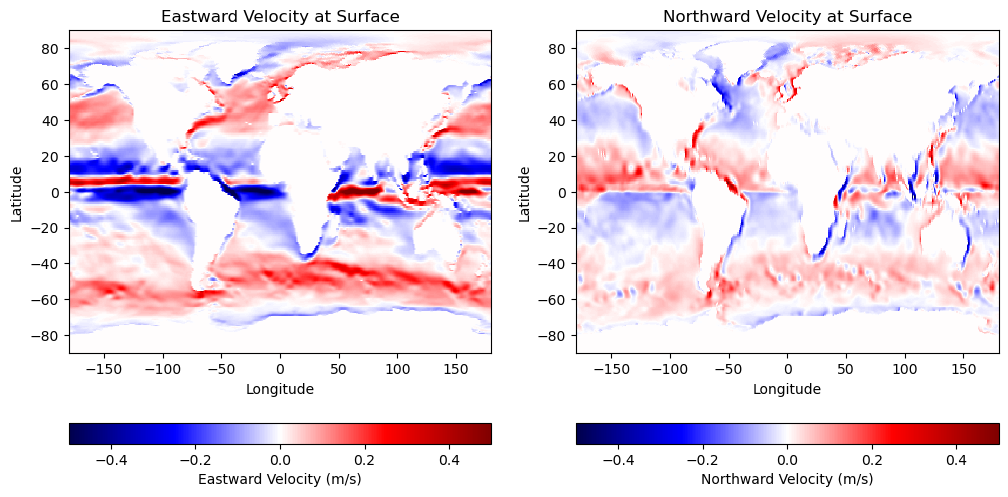

In [7]:
# make a plot of the velocity components (one for each)
# use a divergent colormap (such as seismic) to visualize the data
# for interpretation, it will likely be helpful to adjust the data
# bounds to be +/- 0.5 or even +/- 0.1

# Create figure and subplots
fig = plt.figure(figsize=(12, 6))

# Plot eastward velocity
plt.subplot(1, 2, 1)
C = plt.pcolormesh(lon, lat, EVEL[0, 0, :, :], vmin=-0.5, vmax=0.5, cmap='seismic')
plt.colorbar(C, orientation='horizontal', label='Eastward Velocity (m/s)')
plt.title('Eastward Velocity at Surface')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

# Plot northward velocity
plt.subplot(1, 2, 2)
C = plt.pcolormesh(lon, lat, NVEL[0, 0, :, :], vmin=-0.5, vmax=0.5, cmap='seismic')
plt.colorbar(C, orientation='horizontal', label='Northward Velocity (m/s)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Northward Velocity at Surface')

plt.show()


### Questions:
1. What direction are the surface currents moving (roughly) at:
    - 30$^{\circ}$N on the east cost of the U.S.? the west coast?
    - 45$^{\circ}$N on the east cost of the U.S.? the west coast?
2. Which current flows faster? East coast or west coast?
2. Explain how these currents are part of the gyres in the North Atlantic and North Pacific.

1)
30°N East Coast: The Gulf Stream moves warm water northward.
30°N West Coast: The California Current moves cold water southward.
45°N East Coast: The North Atlantic Drift moves water eastward toward Europe.
45°N West Coast: The Alaskan Current moves water northward.

2) Faster Current: The Gulf Stream on the East Coast is faster due to stronger western boundary currents.

3) These currents form the North Atlantic and North Pacific gyres, driven by wind patterns and Earth's rotation, circulating clockwise.

### Part 2: Horizonal Temperature Structure
Next, examine the mean temperature on the coasts of the U.S. Load in the temperature field `THETA` from the `THETA_2015_12.nc` file. 

In [11]:
# read in the THETA file to an xarray dataset
# note that this file must be in the same folder as this notebook
ds_theta = xr.open_dataset('THETA_2015_12.nc')

In [12]:
# store the THETA grid into a into numpy array
theta = np.array(ds_theta['THETA'])

Similar to your plot above, make a plot of the temperature at the surface of the ocean. 

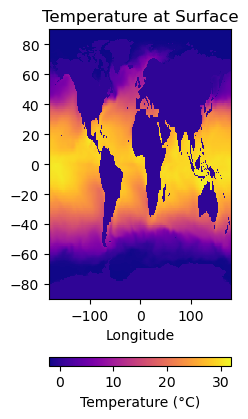

In [14]:
# make a plot of the temperature
# set the data bounds to -2 to 32 with a 
# sensible color map to visualize the data

# make a figure
fig = plt.figure(figsize=(8,5))

# plot the data
plt.subplot(1, 3, 3)
C = plt.pcolormesh(lon, lat, theta[0, 0, :, :], vmin=-2, vmax=32, cmap='plasma')
plt.colorbar(C, orientation='horizontal', label='Temperature (°C)')
plt.xlabel('Longitude')
plt.title('Temperature at Surface')

plt.show()


### Questions:
1. How does the temperature on the west cost of the U.S. compare to the east coast at the same latitude?
2. How might ocean currents contribute to this temperature regime?

Answers
1. The west coast of the U.S. is cooler than the east coast at the same latitude.
2. Cold ocean currents cool the west coast, while warm currents (Gulf Stream) warm the east coast.

### Part 3: Vertical Structure
Next, look at the vertical structure of ocean currents as well as temperature on the U.S coast. Being by loading in the vertical velocity field `WVELSTAR` from the `WVELSTAR_2015_12.nc` file. This variable estimates the speed at which water is moving in the vertical direction.

In [18]:
# read in the WVELSTAR file to an xarray dataset
# note that this file must be in the same folder as this notebook
ds_wvelstar = xr.open_dataset('WVELSTAR_2015_12.nc')


In [19]:
# Convert WVELSTAR to a NumPy array
wvelstar = np.array(ds_wvelstar['WVELSTAR'])

# Check the depth variable name from metadata
print(ds_wvelstar)

<xarray.Dataset>
Dimensions:    (i: 720, j: 360, k_l: 50, time: 1, nv: 2)
Coordinates:
  * i          (i) int64 0 1 2 3 4 5 6 7 8 ... 712 713 714 715 716 717 718 719
  * j          (j) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * k_l        (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * time       (time) datetime64[ns] 2015-12-16T12:00:00
    latitude   (j) float64 ...
    longitude  (i) float64 ...
    timestep   (time) int64 ...
    Zl         (k_l) float32 ...
    time_bnds  (time, nv) datetime64[ns] ...
Dimensions without coordinates: nv
Data variables:
    WVELSTAR   (time, k_l, j, i) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes: (12/20)
    product_time_coverage_start:  1992-01-01T12:00:00
    author:                       Ou Wang and Ian Fenty
    Insitution:                   JPL
    product_version:              ECCO Version 4 Release 4
    time_units:                   days since 1992-01-01 00:00:00
    Conventions:     

Since we'll be plotting a vertical profile, we'll also need a depth variable. Read this variable into a numpy array in the same way you read in the data above.

In [21]:
# read in the depth variable to a numpy array
# Hint: Look at the metadata for the WVELSTAR
# What is the name of the depth variable?

depth = np.array(ds_wvelstar['Zl'])


Next, create side-by-side plots of vertical velocity and temperature along the row corresponding to the latitude 40$^{\circ}$N i.e. index 259 along the latitude axis.

wvelstar shape: (50, 720)
theta shape: (50, 720)


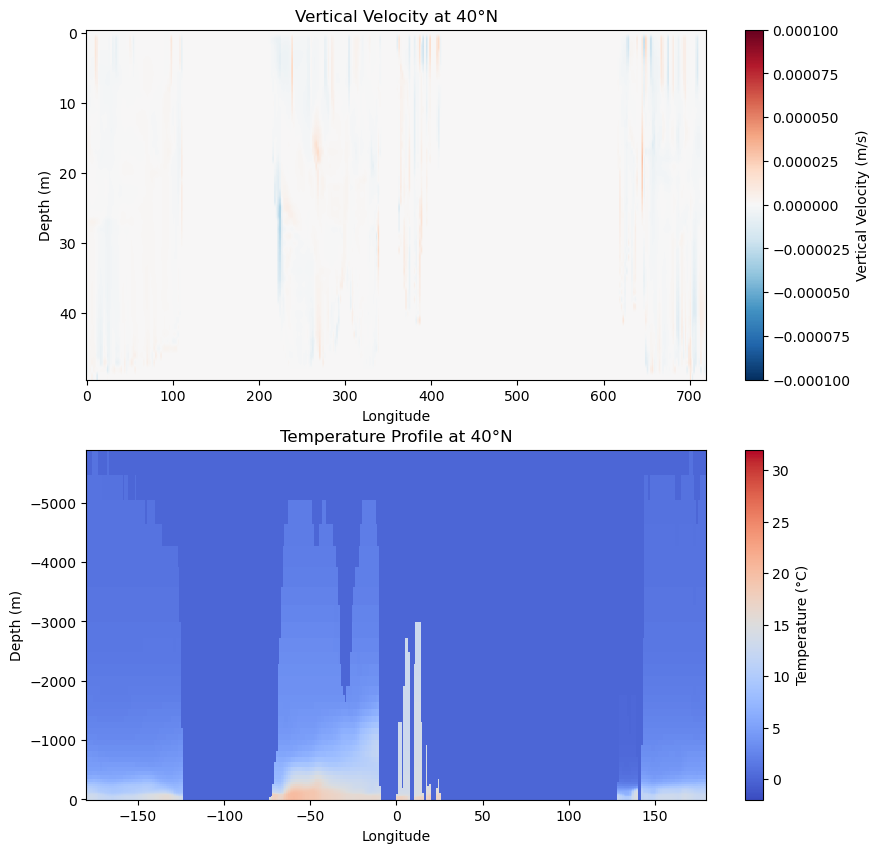

In [23]:
longitude = np.array(ds_wvelstar['longitude']) 
lat_idx = 259  

wvelstar = ds_wvelstar['WVELSTAR'][0, :, lat_idx, :].values  
theta = ds_theta['THETA'][0, :, lat_idx, :].values  

print("wvelstar shape:", wvelstar.shape)  
print("theta shape:", theta.shape) 

fig = plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.imshow(wvelstar, aspect='auto', cmap='RdBu_r', vmin=-0.0001, vmax=0.0001)
plt.colorbar(label="Vertical Velocity (m/s)")
plt.title("Vertical Velocity at 40°N")
plt.xlabel("Longitude")
plt.ylabel("Depth (m)")

plt.subplot(2, 1, 2)
plt.pcolormesh(longitude, depth, theta, cmap='coolwarm', vmin=-2, vmax=32)
plt.colorbar(label="Temperature (°C)")
plt.title("Temperature Profile at 40°N")
plt.xlabel("Longitude")
plt.ylabel("Depth (m)")
plt.gca().invert_yaxis() 

plt.show()


### Questions:
1. How does the vertical velocity in the current on the west coast compare to that on the east?
2. How does the speed of vertical velocity compare to horizontal velocity? Why are they different? In other words, what are the forcing mechanisms associated with each?
3. How might the vertical currents adjacent to the coastline contribute to the differences in surface temperature?
4. Challenge question: On the west coast of the U.S., the prevailing winds tend to flow south in the spring time. How might these winds contribute to the vertical velocity identified in question 1?

1. Vertical velocity is stronger near the west coast because of upwelling, while it's weaker on the east coast.

2. Horizontal velocity is much faster since it's driven by winds and currents, while vertical movement is slower due to water density and layering.

3. Upwelling near the coast brings cold water to the surface, making the west coast cooler than the east.

4. In spring, winds push surface water away from the U.S. west coast, causing deep water to rise and increase vertical velocity.